## Transfer Learning VGG 16 and VGG 19 using Keras

### Objective of Transfer Learning is to take advantage of data from the ﬁrst setting to extract information that may be useful when learning or even when directly making predictions in the second setting

In [1]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\shree\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shree\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shree\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shree\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/shree/Downloads/ChestXRay2017/chest_xray/train'
valid_path = 'C:/Users/shree/Downloads/ChestXRay2017/chest_xray/test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




58892288/58889256 [==============================] - 167s 3us/step


In [6]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('C:/Users/shree/Downloads/ChestXRay2017/chest_xray/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/shree/Downloads/ChestXRay2017/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5232 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('C:/Users/shree/Downloads/ChestXRay2017/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/2
164/164 [==============================] - 1784s 11s/step - loss: 0.1808 - accuracy: 0.9300 - val_loss: 0.1185 - val_accuracy: 0.9006
Epoch 2/2
164/164 [==============================] - 1808s 11s/step - loss: 0.1123 - accuracy: 0.9581 - val_loss: 0.2538 - val_accuracy: 0.9295


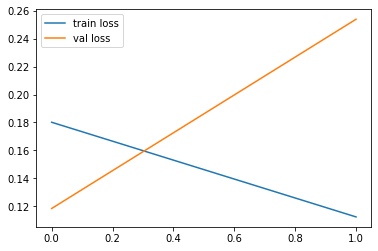

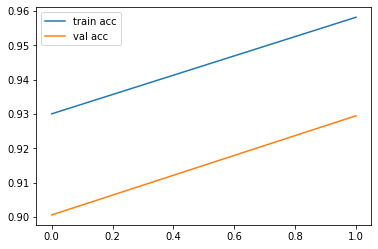

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [32]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [13]:
# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples
#from keras.applications.vgg19 import VGG19
#from keras.applications.inception_v3 import InceptionV3

In [30]:
img=image.load_img('C:/Users/shree/Downloads/ChestXRay2017/chest_xray/train/Val/NORMAL2-IM-1422-0001.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
classes

array([[1.0000000e+00, 2.5949763e-33]], dtype=float32)

In [31]:
img=image.load_img('C:/Users/shree/Downloads/ChestXRay2017/chest_xray/train/Val/person1945_bacteria_4872.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
classes

array([[0., 1.]], dtype=float32)

In [33]:
img=image.load_img('C:/Users/shree/Downloads/ChestXRay2017/chest_xray/Val/person1937_bacteria_4853.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
classes

array([[1.12796314e-10, 1.00000000e+00]], dtype=float32)

In [35]:
img=image.load_img('C:/Users/shree/Downloads/ChestXRay2017/chest_xray/Val/person1946_bacteria_4874.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
classes

array([[0., 1.]], dtype=float32)

In [36]:
img=image.load_img('C:/Users/shree/Downloads/ChestXRay2017/chest_xray/Val/NORMAL2-IM-1412-0001.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
classes

array([[1.0000000e+00, 4.0361042e-28]], dtype=float32)